In [1]:
# ! pip install pyvis
! pip install 'scipy>=1.8'
# !pip install 'networkx<2.7'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.8 MB 133 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from pyvis.network import Network
from IPython.core.display import display, HTML
import numpy as np


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir('/content/drive/MyDrive/UrbanComputing/Project')

In [5]:
datapath_edge = "Dataset/London_edge_data_500m.csv"
datapath_node = "Dataset/London_node_data_500m.csv"

In [6]:
df_edge = pd.read_csv(datapath_edge)
df_node = pd.read_csv(datapath_node)

In [7]:
df_edge.drop('Unnamed: 0',axis=1,inplace=True)
df_node.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df_edge.head()

,location_1,location_2,flows,netw_distance,total_loc_flow,route_factor,subway,bus,airbnb,speed,time,corr_at_destinations,corr_incidence,location1_to_neighbourhood,neighbourhood_to_location2
0,0,0,163,1.87,7079,4.66,0.0,3.0,1.0,44.07,6.69,1.00,1.00,25,13
1,0,1,48,10.21,7079,29.24,0.0,3.0,1.0,64.78,44.35,0.11,0.24,140,148
2,0,2,44,10.35,7079,12.07,0.0,3.0,1.0,66.60,48.06,0.14,0.25,83,53
3,0,3,87,4.94,7079,3.85,0.0,0.0,1.0,71.28,28.96,0.12,0.21,504,524
4,0,4,63,4.39,7079,3.05,0.0,0.0,1.0,62.83,5.57,0.07,0.17,398,416


In [8]:
len(df_edge)

23062236

In [9]:
df_edge_reduced = df_edge.loc[df_edge['flows']!=0,:].copy()

In [10]:
len(df_edge_reduced)

577197

In [11]:
# df_edge_reduced = df_edge.copy()
# df_edge_reduced = df_edge_reduced[df_edge_reduced['location_1'].isin(df_node_reduced['nodeID'])]
# df_edge_reduced = df_edge_reduced[df_edge_reduced['location_2'].isin(df_node_reduced['nodeID'])]

In [12]:
# df_edge_reduced['location_2'].unique()

In [13]:
# df_node_reduced.columns

In [14]:
# df_node = df_node.drop('Unnamed: 0',axis=1)
# df_node.head(2)

In [15]:
# df_node.describe()

In [16]:
# print(len(df_edge),len(df_node))

In [17]:
# len(df_edge_reduced['location_1'])
# x = 0
# for i in range(5):
#   print(x)
#   x+=5765559
# [:5765559] [5765559:11531118] [11531118:17296677] [17296677:]

## Graph

In [18]:
# df_edge_reduced
# del G

In [19]:
# G = nx.DiGraph()
G = nx.Graph()
# nodelist = list(set(df_edge_reduced['location_1']+df_edge_reduced['location_2']))
# G.add_nodes_from(nodelist)
G.add_nodes_from(list(set(df_node['nodeID'])))



In [20]:
# G.edges

In [21]:
# G.add_edges_from(list(zip(df_edge_reduced['location_1'],df_edge_reduced['location_2'])))
G.add_weighted_edges_from(list(zip(df_edge_reduced['location_1'],df_edge_reduced['location_2'],df_edge_reduced['flows'])))

In [ ]:
# fig = plt.figure(figsize=(10,10))
# nx.draw(G)
# plt.show()
# plt.savefig("Graphtest.png", format="PNG")


In [ ]:
G.number_of_edges()

577197

# Pyviz

In [ ]:
# net = Network(height="750px", width="100%" , bgcolor="#222222", font_color="white") 
# # net.from_nx(G)
# edges =list( zip(df_edge_reduced.location_1,df_edge_reduced.location_2,df_edge_reduced.flows))

In [ ]:
# for e in edges:
#   src = e[0]
#   dst = e[1]
#   w = e[2]

#   net.add_node(src, src, title=str(src),physics=True)
#   net.add_node(dst, dst, title=str(dst),physics=True)
#   net.add_edge(src, dst, value=w,physics=True)

In [ ]:
# net.prep_notebook()
# net.show('nodes.html')

In [ ]:
# display(HTML("nodes.html"))
# # os.listdir()

## Page Rank

In [22]:
pr = nx.pagerank(G, alpha=0.9)
# pr_sorted = sorted([pr],key= lambda x:x.values())
lists = sorted(pr.items(), key=lambda kv: kv[1], reverse=True) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

In [23]:
# y = [round(i,5) for i in y]
# y[0]

In [24]:
# Top 10 page rank
listsRound = [(i,round(j,4)) for i,j in lists]
listsRound[:10]

[(1244, 0.0012),
 (4054, 0.0012),
 (2629, 0.0012),
 (2971, 0.0011),
 (3404, 0.0011),
 (6583, 0.0011),
 (5, 0.0011),
 (2, 0.0011),
 (6635, 0.0011),
 (2956, 0.001)]

In [25]:
lists[::-1][:10]

[(6686, 1.5521442879636894e-05),
 (6685, 1.5521442879636894e-05),
 (6646, 1.5521442879636894e-05),
 (6645, 1.5521442879636894e-05),
 (6606, 1.5521442879636894e-05),
 (6572, 1.5521442879636894e-05),
 (6570, 1.5521442879636894e-05),
 (6494, 1.5521442879636894e-05),
 (5804, 1.5521442879636894e-05),
 (5803, 1.5521442879636894e-05)]

In [26]:
np.mean(y)

0.00014725371815638342

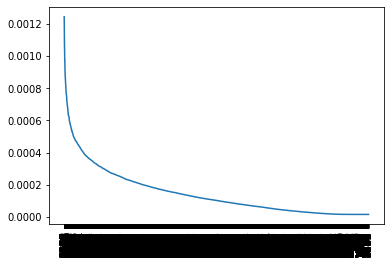

In [27]:
# fig = plt.figure(figsize=(20,20))
# sns.lineplot(x=pr.keys(),y=pr.values())
ax = sns.lineplot(x=[str(i) for i in x],y=y)
ax.tick_params(axis='x', rotation=90)

plt.savefig("PAGERANK.png", format="PNG")

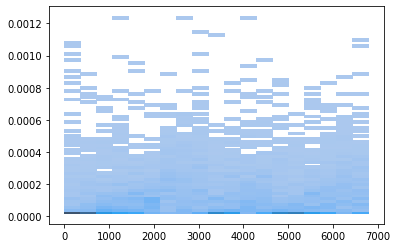

In [ ]:
sns.histplot(x=x,y=y)

Inference:


## HITS

In [ ]:
h,a=nx.hits(G)

/usr/local/lib/python3.8/dist-packages/networkx/algorithms/link_analysis/hits_alg.py:78: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)


In [ ]:
h_lists = sorted(h.items(), key=lambda kv: kv[1], reverse=True)

In [ ]:
h_lists[:10]

[(6, 0.0636230083414534),
 (1, 0.0635319424572523),
 (5, 0.04517957860782198),
 (0, 0.0269090996275127),
 (2, 0.025751500413347245),
 (3, 0.018065633514332456),
 (8, 0.006995131561256387),
 (1315, 0.006133292131014592),
 (1107, 0.005305691299070654),
 (1244, 0.00427829269180053)]

In [ ]:
h_lists[::-1][:10]

[(1189, -4.1176371831186033e-26),
 (5635, -3.240658740070748e-26),
 (536, -1.862419319237201e-26),
 (320, -1.7553148509063194e-26),
 (4908, -1.4759066271213805e-26),
 (1190, -5.044956656774757e-27),
 (578, -2.6571986887060726e-27),
 (6686, 0.0),
 (6685, 0.0),
 (6646, 0.0)]

In [ ]:
a_lists = sorted(a.items(), key=lambda kv: kv[1], reverse=True)

In [ ]:
a_lists[:10]

[(6, 0.06362300834145344),
 (1, 0.0635319424572523),
 (5, 0.045179578607821985),
 (0, 0.026909099627512704),
 (2, 0.025751500413347332),
 (3, 0.018065633514332432),
 (8, 0.006995131561256418),
 (1315, 0.00613329213101459),
 (1107, 0.005305691299070655),
 (1244, 0.004278292691800531)]

In [ ]:
a_lists[::-1][:10]

[(1189, -1.1271231462640722e-22),
 (536, -1.0196021793118539e-22),
 (320, -9.609666463809929e-23),
 (35, -8.870673429052081e-23),
 (4908, -8.080015053162732e-23),
 (1190, -2.761917656593132e-23),
 (578, -1.454712988576045e-23),
 (6686, 0.0),
 (6685, 0.0),
 (6646, 0.0)]

In [ ]:
a_x, a_y = zip(*a_lists) # unpack a list of pairs into two tuples
h_x, h_y = zip(*h_lists) # unpack a list of pairs into two tuples

In [ ]:
np.mean(a_y)

0.00014725371815638342

In [ ]:
np.mean(h_y)

0.00014725371815638348

### Hubs

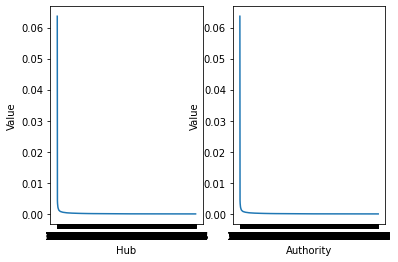

In [ ]:
# fig = plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
# ax = sns.lineplot(x=h.keys(),y=h.values())
ax = sns.lineplot(x=[str(i) for i in h_x],y=h_y)
ax.set(ylabel='Value', xlabel='Hub')

plt.subplot(1, 2, 2)
ax = sns.lineplot(x=[str(i) for i in a_x],y=a_y)
ax.set(ylabel='Value', xlabel='Authority')
# plt.show()

plt.savefig("HITS_sorted.png", format="PNG")

### Authorities

Inference:


## Degree Distribution

In [28]:
Degree = dict(G.degree())

In [29]:
Degree_sorted = sorted(Degree.items(), key=lambda kv: kv[1], reverse=True)

In [30]:
Degree_sorted[:10]

[(6635, 1670),
 (96, 1602),
 (2, 1582),
 (97, 1552),
 (2629, 1542),
 (1443, 1486),
 (1442, 1476),
 (4054, 1470),
 (30, 1395),
 (2836, 1382)]

In [31]:
Degree_sorted[::-1][:10]

[(6686, 0),
 (6685, 0),
 (6646, 0),
 (6645, 0),
 (6606, 0),
 (6572, 0),
 (6570, 0),
 (6494, 0),
 (5804, 0),
 (5803, 0)]

In [32]:
deg_x, deg_y = zip(*Degree_sorted) # unpack a list of pairs into two tuples

In [33]:
np.mean(deg_y)

169.9888087174201

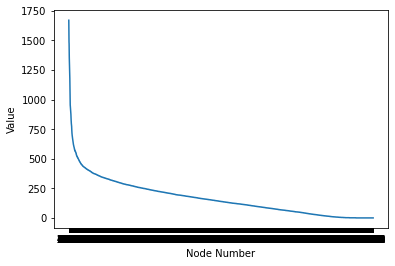

In [34]:
# fig = plt.figure(figsize=(20,20))

# ax = sns.lineplot(x=Degree.keys(),y=Degree.values())
ax = sns.lineplot(x=[str(i) for i in deg_x],y=deg_y)
ax.set(ylabel='Value', xlabel='Node Number')
plt.savefig("DegreePlot_sorted.png", format="PNG")
# dict(InDegree)

Inference:


In [ ]:

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(15, 8))
# Create a gridspec for adding subplots of different sizes
# axgrid = fig.add_gridspec(5, 4)
axgrid = fig.add_gridspec(1, 1)

# ax0 = fig.add_subplot(axgrid[0:3, :])
ax0 = fig.add_subplot(axgrid[:, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

# # ax1 = fig.add_subplot(axgrid[3:, :2])
# ax1 = fig.add_subplot(axgrid[:, :1]) 
# ax1.plot(degree_sequence, "b-", marker="o")
# ax1.set_title("Degree Rank Plot")
# ax1.set_ylabel("Degree")
# ax1.set_xlabel("Rank")

# # ax2 = fig.add_subplot(axgrid[3:, 2:])
# ax2 = fig.add_subplot(axgrid[:, 1:])
# ax2.bar(*np.unique(degree_sequence, return_counts=True))
# ax2.set_title("Degree histogram")
# ax2.set_xlabel("Degree")
# ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.savefig("Connected Components.png", format="PNG")
# plt.savefig("DegreeRank_DegreeHiast.png", format="PNG")
plt.show()

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f0c7f5cb8b0> (for post_execute):


KeyboardInterrupt: ignored

In [52]:
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])

In [53]:
# Gcc.nodes
conn_com = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

In [54]:
largest_cc = max(nx.connected_components(G), key=len)
# largest_cc

In [55]:
Sub = [G.subgraph(c).copy() for c in nx.connected_components(G)]

In [56]:
Sub = sorted(Sub,key=len)

In [57]:
for i in Sub[:10]:
  print(len(i))

1
1
1
1
1
1
1
1
1
1


In [58]:
for i in Sub[::-1][:10]:
  print(len(i))

6393
2
1
1
1
1
1
1
1
1


## Power Law

Inference:


## Cliques

In [ ]:
# for i in nx.enumerate_all_cliques(G):
#   if len(i)>2:
#     print(i)
#     break
  # print(i)
  # break
# cli = list(nx.find_cliques(G))

In [ ]:
# cli[1]

Inference:


In [ ]:
2

## Centrality - Between 

### Degree Centrality

In [ ]:
# Degree Centrality
DegCent = nx.degree_centrality(G)


In [ ]:
DegreeCent_sorted = sorted(DegCent.items(), key=lambda kv: kv[1], reverse=True)

In [ ]:
DegreeCent_sorted[:10]

[(6635, 0.24594992636229748),
 (96, 0.23593519882179675),
 (2, 0.23298969072164946),
 (97, 0.22857142857142856),
 (2629, 0.22709867452135493),
 (1443, 0.21885125184094256),
 (1442, 0.2173784977908689),
 (4054, 0.21649484536082472),
 (30, 0.20544918998527245),
 (2836, 0.20353460972017673)]

In [ ]:
DegreeCent_sorted[::-1][:10]

[(6686, 0.0),
 (6685, 0.0),
 (6646, 0.0),
 (6645, 0.0),
 (6606, 0.0),
 (6572, 0.0),
 (6570, 0.0),
 (6494, 0.0),
 (5804, 0.0),
 (5803, 0.0)]

In [ ]:
degC_x, degC_y = zip(*DegreeCent_sorted) # unpack a list of pairs into two tuples

In [ ]:
np.mean(degC_y)

0.025035170650577334

[Text(0, 0.5, 'Value'), Text(0.5, 0, 'Node Number')]

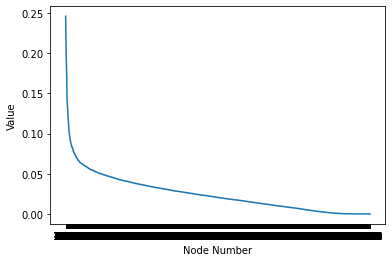

In [ ]:
# fig = plt.figure(figsize=(20,20))

ax = sns.lineplot(x=[str(i) for i in degC_x],y=degC_y)
ax.set(ylabel='Value', xlabel='Node Number')


# ax0=sns.lineplot(DegCent.keys(),DegCent.values())
# ax0.set_title("Degree Centrality of G")
plt.savefig("Degree_Centrality_sorted.png", format="PNG")

Inference:


### Betweenness Centrality

In [ ]:
BetCent = nx.betweenness_centrality(G)

In [ ]:
BetCent_sorted = sorted(BetCent.items(), key=lambda kv: kv[1], reverse=True)

In [ ]:
BetCent_sorted[:10]

[(2, 0.01382719241269479),
 (5, 0.011110520735515338),
 (6635, 0.011010830287867307),
 (4054, 0.010657802383314527),
 (3, 0.010579039029058768),
 (2629, 0.009440941804141716),
 (1443, 0.009079524821199579),
 (96, 0.008606084320044546),
 (1442, 0.008492783625143828),
 (97, 0.008092524078977158)]

In [ ]:
BetCent_sorted[::-1][:10]

[(6716, 0.0),
 (6686, 0.0),
 (6685, 0.0),
 (6646, 0.0),
 (6645, 0.0),
 (6609, 0.0),
 (6606, 0.0),
 (6573, 0.0),
 (6572, 0.0),
 (6570, 0.0)]

In [ ]:
betC_x, betC_y = zip(*BetCent_sorted) # unpack a list of pairs into two tuples

In [ ]:
np.mean(betC_y)

0.00017699036789112766

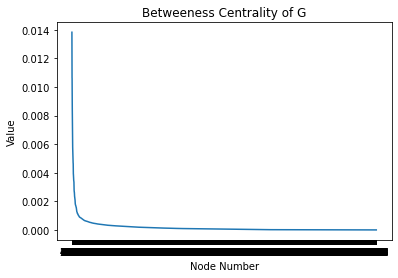

In [ ]:
# fig = plt.figure(figsize=(20,20))

ax = sns.lineplot(x=[str(i) for i in betC_x],y=betC_y)
ax.set(ylabel='Value', xlabel='Node Number')
ax.set_title("Betweeness Centrality of G")


# sns.lineplot(BetCent.keys(),BetCent.values())
# ax0.set_title("Betweeness Centrality of G")
plt.savefig("Betweeness_Centrality_sorted.png", format="PNG")

Inference:


### Closeness Centrality

In [ ]:
CloCent = nx.closeness_centrality(G)

In [ ]:
cloCent_sorted = sorted(CloCent.items(), key=lambda kv: kv[1], reverse=True)

In [ ]:
cloCent_sorted[:10]

[(6635, 0.5258524000047877),
 (2629, 0.5219298302762413),
 (2, 0.5215227087237637),
 (96, 0.5201702120725092),
 (97, 0.5173526793272105),
 (4054, 0.5172637336245841),
 (1443, 0.5167307010094278),
 (1442, 0.5151381742363484),
 (2836, 0.5140380158256267),
 (5, 0.5115906319720104)]

In [ ]:
cloCent_sorted[::-1][:10]

[(6686, 0.0),
 (6685, 0.0),
 (6646, 0.0),
 (6645, 0.0),
 (6606, 0.0),
 (6572, 0.0),
 (6570, 0.0),
 (6494, 0.0),
 (5804, 0.0),
 (5803, 0.0)]

In [ ]:
cloC_x, cloC_y = zip(*cloCent_sorted) # unpack a list of pairs into two tuples

In [ ]:
np.mean(cloC_y)

0.3813602051080588

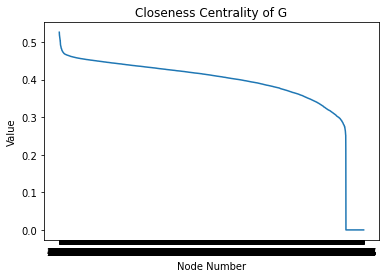

In [ ]:
# fig = plt.figure(figsize=(20,20))

ax = sns.lineplot(x=[str(i) for i in cloC_x],y=cloC_y)
ax.set(ylabel='Value', xlabel='Node Number')
ax.set_title("Closeness Centrality of G")

# sns.lineplot(CloCent.keys(),CloCent.values())
# ax0.set_title("Closeness Centrality of G")
plt.savefig("Closeness_Centrality_sorted.png", format="PNG")

Inference:


### eigenvector Centrality

In [ ]:
Eigen_cent = nx.eigenvector_centrality_numpy(G)

In [ ]:
eigCent_sorted = sorted(Eigen_cent.items(), key=lambda kv: kv[1], reverse=True)

In [ ]:
eigCent_sorted[:10]

[(96, 0.08037184297909848),
 (2629, 0.07781560271698),
 (97, 0.07650910117931506),
 (6635, 0.07499236790675595),
 (98, 0.07269921018773265),
 (2836, 0.07267975750620029),
 (2837, 0.07161338080436379),
 (30, 0.06717786449216462),
 (2, 0.06706065269080524),
 (2835, 0.06668365598236349)]

In [ ]:
eigCent_sorted[::-1][:10]

[(454, -3.2824781424470496e-18),
 (476, -2.331821597372923e-18),
 (5056, -2.221141780747648e-18),
 (5149, -2.1451462696241114e-18),
 (224, -2.0922174889194096e-18),
 (610, -2.084924029151804e-18),
 (5636, -2.083483812300778e-18),
 (338, -2.0683575439667547e-18),
 (468, -1.971619448268873e-18),
 (3300, -1.9604481785285132e-18)]

In [ ]:
eigC_x, eigC_y = zip(*eigCent_sorted) # unpack a list of pairs into two tuples

In [ ]:
np.mean(eigC_y)

0.008293679471144205

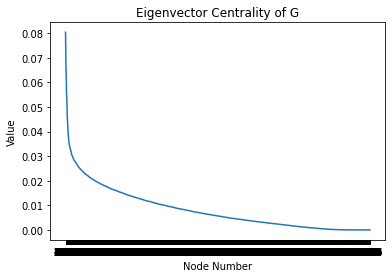

In [ ]:
# fig = plt.figure(figsize=(20,20))

ax = sns.lineplot(x=[str(i) for i in eigC_x],y=eigC_y)
ax.set(ylabel='Value', xlabel='Node Number')
ax.set_title("Eigenvector Centrality of G")


# sns.lineplot(Eigen_cent.keys(),Eigen_cent.values())
# ax0.set_title("Eigenvector Centrality of G")
plt.savefig("eigenvector_Centrality_sorted.png", format="PNG")

Inference:


Inference:


## Finding the shortest Path

In [ ]:
# nx.single_source_shortest_path(G,100)
nx.single_source_shortest_path_length(G,100)


Plot average number of shortest paths

In [ ]:
# Dameter of the graph

## Clustering Coefficient

In [35]:
Clust_coef = nx.clustering(G)

In [ ]:
Clust_coef

In [39]:
Clustering_sorted = sorted(Clust_coef.items(), key=lambda kv: kv[1], reverse=True)

In [43]:
Clustering_sorted[:10]

[(67, 1.0),
 (124, 1.0),
 (181, 1.0),
 (183, 1.0),
 (204, 1.0),
 (276, 1.0),
 (303, 1.0),
 (331, 1.0),
 (344, 1.0),
 (405, 1.0)]

In [50]:
Clustering_sorted[::-1][600:650]

[(49, 0),
 (48, 0),
 (44, 0),
 (43, 0),
 (42, 0),
 (41, 0),
 (38, 0),
 (36, 0),
 (35, 0),
 (34, 0),
 (31, 0),
 (29, 0),
 (24, 0),
 (20, 0),
 (15, 0),
 (14, 0),
 (10, 0),
 (5207, 0.047619047619047616),
 (1092, 0.047619047619047616),
 (2, 0.08460890966081722),
 (3, 0.08855684237512958),
 (5, 0.09166802650783722),
 (1443, 0.09389068926722077),
 (5769, 0.09523809523809523),
 (4213, 0.09523809523809523),
 (1442, 0.09547246179765863),
 (6635, 0.09774879556462808),
 (5255, 0.1),
 (5189, 0.1),
 (4878, 0.1),
 (4153, 0.1),
 (4054, 0.1034140742102829),
 (1444, 0.10345135330196367),
 (1487, 0.10379266261186224),
 (96, 0.10430503439649781),
 (97, 0.10457360628084716),
 (30, 0.1052553407431245),
 (4761, 0.10606060606060606),
 (1, 0.10635377566013851),
 (8, 0.10637759710930443),
 (4383, 0.10756389685742533),
 (4096, 0.10822870981662047),
 (1231, 0.10871432811108855),
 (4, 0.10985165035474916),
 (5647, 0.11081963663918307),
 (4931, 0.1111111111111111),
 (5672, 0.11160792626857499),
 (670, 0.1121500913

In [41]:
clustC_x, clustC_y = zip(*Clustering_sorted) # unpack a list of pairs into two tuples

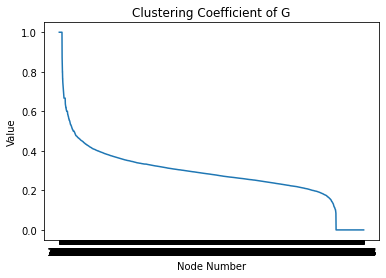

In [51]:
# fig = plt.figure(figsize=(20,20))

ax = sns.lineplot(x=[str(i) for i in clustC_x],y=clustC_y)
ax.set(ylabel='Value', xlabel='Node Number')


# ax0=sns.lineplot(DegCent.keys(),DegCent.values())
ax.set_title("Clustering Coefficient of G")
plt.savefig("ClusteringCoeff_sorted.png", format="PNG")

## Community detection - Edge betweeness - dendograms